In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.metrics import mean_squared_error

In [3]:
df_train=pd.read_csv('datasets/cleaned_train_data.csv')

In [4]:
list(df_train.columns)

['pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 'flr2nd_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual'

In [5]:
df_test = pd.read_csv('datasets/Test_Data_Cleaned_All_Features.csv')

In [6]:
df_test.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', 'flr2nd_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_

In [7]:
df_test.columns.equals(df_train.columns)

False

In [8]:
set(df_test.columns)-set(df_train.columns)

set()

In [9]:
set(df_train.columns)-set(df_test.columns)

{'saleprice'}

In [10]:
def EDA(df):
    df['baths'] = df['bsmt_full_bath'] + df['full_bath'] + (df['bsmt_half_bath']/2) + (df['half_bath']/2)
    
    df['home_age'] = df['yr_sold'] - df['year_built']
    
    df['total_sf']=df['1st_flr_sf'] + df['flr2nd_sf']
        
    df.drop(columns=['bsmt_full_bath', 'full_bath',
                     'bsmt_half_bath','half_bath', 
                     '1st_flr_sf', 'flr2nd_sf',
                     'yr_sold','year_built'], inplace=True)
    

In [11]:
# function to map new values
def map_new_vals(df,colname,dictionary):
    df[colname] = df[colname].map(dictionary)
    
# defining dictionaries for renaming
lotshape_di = {'Reg': 0,
                   'IR1': 1,
                   'IR2': 2,
                   'IR3': 3}
bsmtex_di = {'None': 0,
                'No': 1,
                'Mn': 2,
                'Av': 3,
                'Gd': 4}
qual_di = {'Ex': 5,
               'Gd': 4,
               'TA': 3,
               'Fa': 2,
               'Po': 1,
               'None': 0}
bsmt_fin_di ={'GLQ':6,
                'ALQ':5,
                'BLQ':4,
                'Rec':3,
                'LwQ':2,
                'Unf':1,
                'NA':0}

    
# map new values for df_train
map_new_vals(df_train,'lot_shape', dictionary = lotshape_di)
map_new_vals(df_train,'bsmt_exposure', dictionary = bsmtex_di)
map_new_vals(df_train,'exter_qual', dictionary = qual_di)
map_new_vals(df_train,'bsmt_qual', dictionary = qual_di)
map_new_vals(df_train,'heating_qc', dictionary = qual_di)
map_new_vals(df_train,'kitchen_qual', dictionary = qual_di)
map_new_vals(df_train,'fireplace_qu', dictionary = qual_di)
map_new_vals(df_train,'bsmt_cond', dictionary = qual_di)
map_new_vals(df_train,'garage_qual', dictionary = qual_di)
map_new_vals(df_train,'bsmtfin_type_1',dictionary = bsmt_fin_di)
map_new_vals(df_train,'bsmtfin_type_2',dictionary = bsmt_fin_di)


# map new values for df_train
map_new_vals(df_test,'lot_shape', dictionary = lotshape_di)
map_new_vals(df_test,'bsmt_exposure', dictionary = bsmtex_di)
map_new_vals(df_test,'exter_qual', dictionary = qual_di)
map_new_vals(df_test,'bsmt_qual', dictionary = qual_di)
map_new_vals(df_test,'heating_qc', dictionary = qual_di)
map_new_vals(df_test,'kitchen_qual', dictionary = qual_di)
map_new_vals(df_test,'fireplace_qu', dictionary = qual_di)
map_new_vals(df_test,'bsmt_cond', dictionary = qual_di)
map_new_vals(df_test,'garage_qual', dictionary = qual_di)
map_new_vals(df_test,'bsmtfin_type_1',dictionary = bsmt_fin_di)
map_new_vals(df_test,'bsmtfin_type_2',dictionary = bsmt_fin_di)


In [12]:
EDA(df_train)

In [13]:
EDA(df_test)

In [14]:
col_to_get_dummies=['ms_subclass','ms_zoning','street','land_contour','lot_config',
         'neighborhood','condition_1','condition_2', 'bldg_type',
       'house_style','roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type','foundation','heating','central_air',
        'garage_type']

In [15]:
df_train = pd.get_dummies(df_train, columns = col_to_get_dummies, drop_first=True)
df_test = pd.get_dummies(df_test,columns= col_to_get_dummies,drop_first=True)

In [16]:
#top 20 columns
t= df_train.corr()[['saleprice']].sort_values('saleprice',ascending=False)
t.head(20)

,saleprice
saleprice,1.000000
overall_qual,0.801721
total_sf,0.717370
exter_qual,0.713285
gr_liv_area,0.709043
kitchen_qual,0.690062
garage_area,0.657137
garage_cars,0.652963
total_bsmt_sf,0.647598
baths,0.630229


In [17]:
#bottom 10 columns
t.tail(10)

,saleprice
ms_subclass_50,-0.186563
neighborhood_Names,-0.191909
exterior_1st_Wd Sdng,-0.192760
neighborhood_OldTown,-0.210424
ms_subclass_30,-0.246538
roof_style_Gable,-0.252430
pid,-0.253776
ms_zoning_RM,-0.282624
foundation_CBlock,-0.358917
home_age,-0.571860


In [18]:
good_cols = ['home_age','ms_zoning_RM','foundation_CBlock','overall_qual','total_sf','exter_qual','gr_liv_area',
                             'kitchen_qual','garage_area','total_bsmt_sf','baths','totrms_abvgrd',
                             'mas_vnr_area','fireplaces','year_remod/add','heating_qc','neighborhood_NridgHt',
                            ]


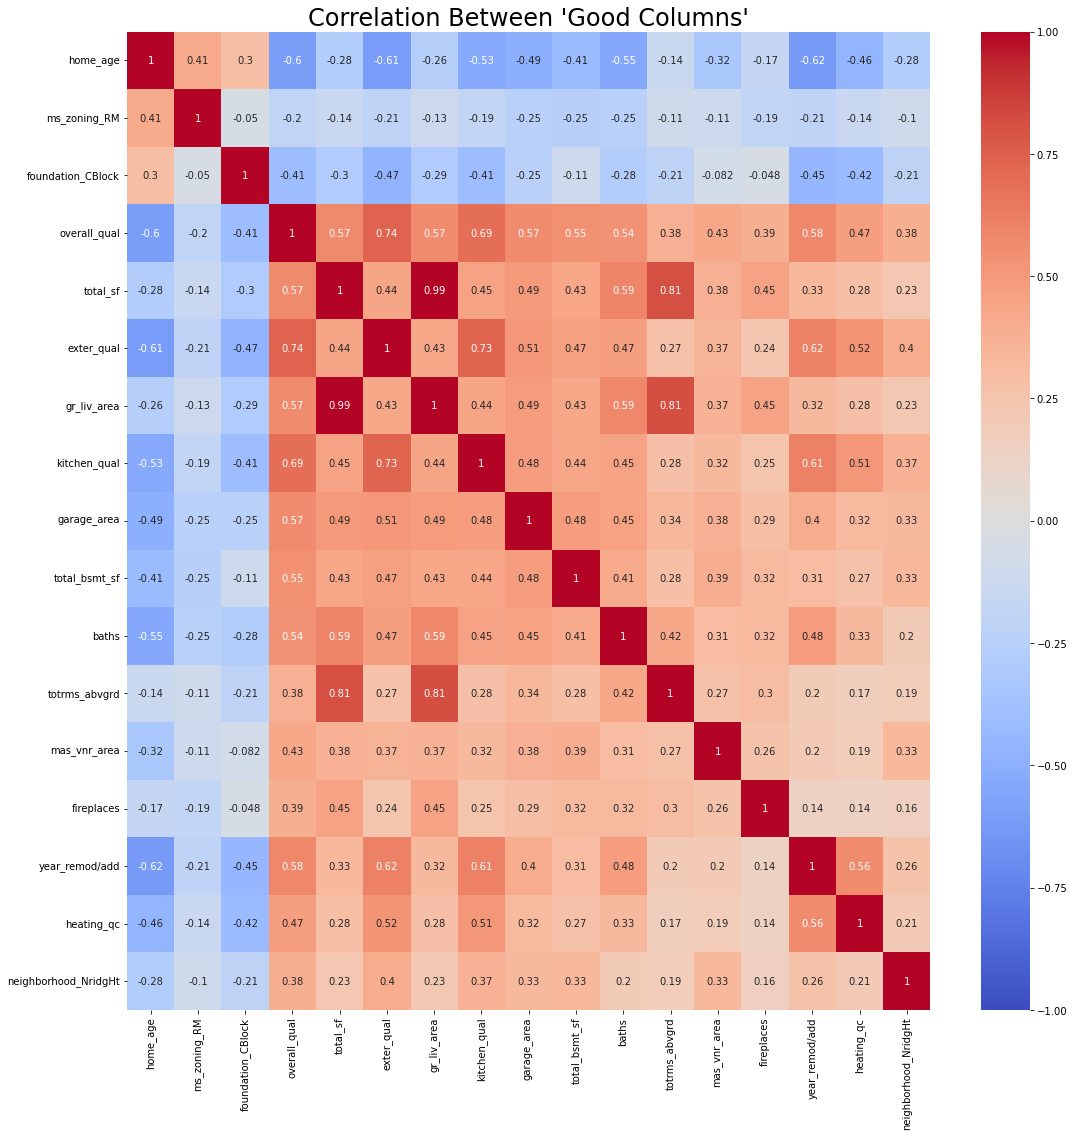

In [19]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_train[good_cols].corr(),
           annot=True,
           cmap='coolwarm',
           vmin=-1)
plt.title("Correlation Between 'Good Columns'", fontsize=24);

**Very high correlation between gr_liv_area and total_sf**

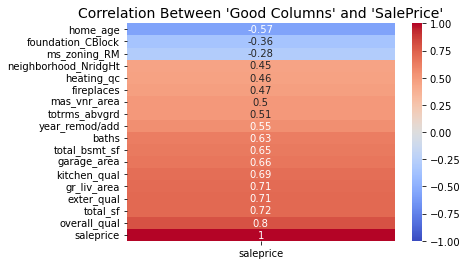

In [20]:
sns.heatmap(df_train[good_cols+['saleprice']].corr()[['saleprice']].sort_values('saleprice'),
           annot=True,
           cmap='coolwarm',
           vmin=-1)
plt.title("Correlation Between 'Good Columns' and 'SalePrice'", fontsize=14);

In [21]:
X=df_train[good_cols]
y=df_train['saleprice']

In [22]:
X=StandardScaler().fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

**Model 1: Linear Regression Cross val**

In [24]:
lr = LinearRegression()

In [25]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.8397693936967853

**Model 2:Ridge CV**

In [26]:
ridge1 = RidgeCV()

In [27]:
cross_val_score(ridge1, X_train, y_train, cv=5).mean()

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


0.8401863381161121

**Model 3:Lasso CV**

In [28]:
lasso1 = LassoCV(cv=5)

In [29]:
cross_val_score(lasso1, X_train, y_train, cv=5).mean()

0.8395727292919485

**Model 4:Optimal Lasso Alpha**

In [30]:
#find optimal alpha.
l_alphas=np.logspace(-3, 1, 100)

lasso_model = LassoCV(alphas=l_alphas, cv=5)

lasso_model = lasso_model.fit(X_train, y_train)

In [31]:
lasso_model.alpha_

10.0

In [32]:
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_train_lasso 

array([112048.30552162, 208026.8670902 , 128673.41734746, ...,
       227568.52532446,  62519.57316193, 225987.55467305])

In [33]:
lasso_model.score(X_train, y_train)

0.8463169587928638

In [34]:
y_pred_test_lasso = lasso_model.predict(X_test)

In [35]:
lasso_model.score(X_test, y_test)

0.8388661441102436

In [36]:
lasso_model.coef_


array([-9.76140543e+02, -3.71732549e+03, -8.95409566e+00,  1.74338261e+04,
        1.60383904e+04,  7.75483319e+03,  5.12900195e+03,  8.44360154e+03,
        8.05125254e+03,  1.08415599e+04,  6.31596629e+03, -2.65831231e+03,
        4.61007083e+03,  5.69694402e+03,  7.70213286e+02,  2.48930688e+03,
        6.49852113e+03])

In [37]:
residuals_lasso = y_test - y_pred_test_lasso

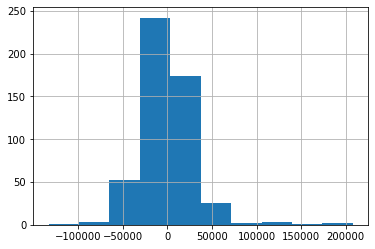

In [38]:
residuals_lasso.hist();

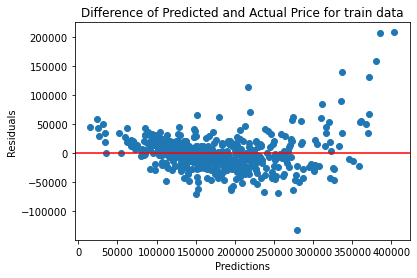

In [39]:
plt.scatter(y_pred_test_lasso, residuals_lasso)
plt.title("Difference of Predicted and Actual Price for train data")
plt.xlabel("Predictions")
plt.ylabel("Residuals")

plt.axhline(y=0, color='r', linestyle='-');

In [40]:
rss_lasso = (residuals_lasso**2).sum()

lasso_RMSE = np.sqrt(rss_lasso / len(y_pred_test_lasso))
lasso_RMSE


31058.191622657017

Since my LASSO model didn't actually drive down any of my coefficients to 0, I will try Ridge now.

In [41]:
ridge1.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [42]:
ridge1.score(X_train, y_train)

0.8462983434128761

In [43]:
ridge1.score(X_test, y_test)

0.8392158483403662

In [44]:
y_pred_ridge = ridge1.predict(X_test)

In [45]:
residuals_ridge = y_test - y_pred_ridge

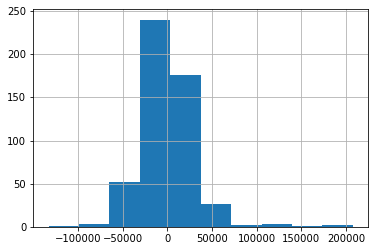

In [46]:
residuals_ridge.hist();

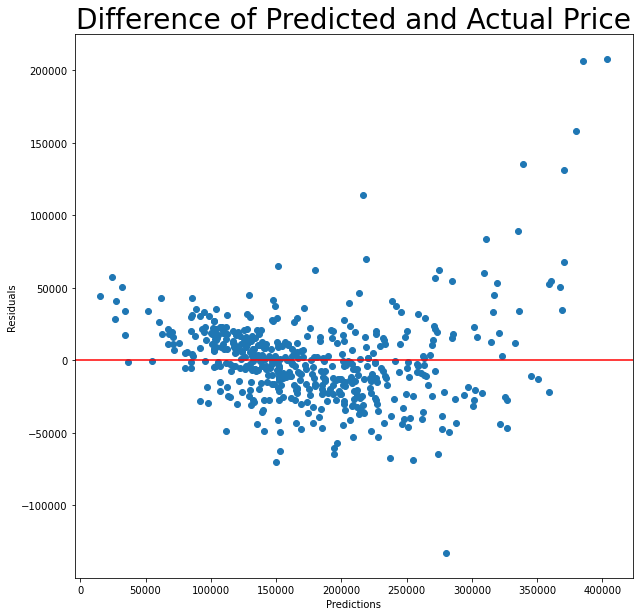

In [47]:
plt.figure(figsize=(10, 10))
plt.scatter(y_pred_ridge, residuals_ridge)
plt.title("Difference of Predicted and Actual Price", fontsize=28)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

plt.axhline(y=0, color='r', linestyle='-');

There are a few outliers in the top right corner. This tells me that the model is having a harder time predicting the price of some of the more expensive homes. Overall, the errors are somewhat linear and normally distributed.

In [48]:
rss_ridge = (residuals_ridge**2).sum()

len(y_pred_ridge)

ridge_RMSE = np.sqrt(rss_ridge / len(y_pred_ridge))
ridge_RMSE


31024.470961465584

I didn't find any optimal alpha for the ridge model on the first try so since there is still room to improve, I will try that now.

In [49]:
r_alphas = np.logspace(0, 5, 100)
# Generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

# Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_model = ridge_model.fit(X_train, y_train)

In [50]:
ridge_model.alpha_

83.02175681319744

In [51]:
ridge_model.score(X_train, y_train)

0.8459688611005025

In [52]:
ridge_model.score(X_test, y_test)

0.8400148723758055

**Predicting for the test dataset**

In [53]:
X_testdata = df_test[good_cols]

In [54]:
X_testdata=StandardScaler().fit_transform(X_testdata)

In [56]:
y_hat_lassomodel= lasso_model.predict(X_testdata)
y_hat_ridge1 = ridge1.predict(X_testdata)
y_hat_ridgemodel =ridge_model.predict(X_testdata)

In [57]:
pf_submission1_df = pd.DataFrame({
    'Id': df_test['pid'],
    'SalePrice': y_hat_lassomodel   
})
pf_submission1_df.head()

,Id,SalePrice
0,902301120,145781.649760
1,905108090,186527.101780
2,528218130,211335.698779
3,902207150,118352.256318
4,535105100,192994.423109


In [58]:
pf_submission2_df = pd.DataFrame({
    'Id': df_test['pid'],
    'SalePrice': y_hat_ridge1 
})
pf_submission2_df.head()

,Id,SalePrice
0,902301120,145424.371755
1,905108090,186582.214378
2,528218130,211499.202627
3,902207150,118425.514051
4,535105100,192942.383548


In [59]:
pf_submission3_df = pd.DataFrame({
    'Id': df_test['pid'],
    'SalePrice': y_hat_ridgemodel   
})
pf_submission3_df.head()

,Id,SalePrice
0,902301120,144937.449409
1,905108090,188124.965012
2,528218130,212431.245861
3,902207150,119151.656407
4,535105100,192509.784039


In [61]:
pf_submission1_df.to_csv('datasets/submission1.csv', index=False)

In [63]:
pf_submission2_df.to_csv('datasets/submission2.csv', index=False)

In [64]:
pf_submission3_df.to_csv('datasets/submission3.csv', index=False)